##2. Erstelle für diesen neuen Datensatz eine vollständige deskriptive Statistik und zeige dabei: Welche Variablen sind noch enthalten, wie sind diese ausgeprägt (Häufigkeiten / Lage- und Streuungsmaße / Boxplots & Histogramme)

In [2]:
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import plotly.express as px
import missingno as msno

In [3]:
uni_df = pd.read_excel("C:\\Users\\User\\Desktop\\Statistik\\Project\\Fallstudiendaten_Uni.xlsx" )
uni_df

,Participant,Studiengang,Standort,Besuch Wirtschaftsmathematik,Geschlecht,Geburtsjahr,Beziehungsstatus,Durchschnittsnote im Abitur,Mathematiknote im Abitur,LK_Deutsch,...,Zeit-Sonstiges,Wechsel Praxispartner,Lebenszufriedenheit,Zufriedenheit mit Praxispartner,Zufriedenheit mit finanzieller Situation,Zufriedenheit mit Gesundheit,Zufriedenheit mit Kommilitonenaustausch,Studienzufriedenheit,Mathenote im 2. Semester,Zufriedenheit mit Note
0,53,4,21,5.0,1,24.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,4,21,6.0,2,19.0,3.0,3.0,3.0,0.0,...,1.0,2.0,5.0,3.0,2.0,5.0,7.0,7.0,1.3,2.0
2,56,4,21,6.0,2,22.0,1.0,3.3,2.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,16,21,8.0,2,21.0,2.0,2.3,3.0,1.0,...,NaN,2.0,6.0,3.0,2.0,6.0,5.0,6.0,NaN,NaN
4,58,16,21,5.0,1,19.0,1.0,NaN,NaN,NaN,...,NaN,3.0,10.0,10.0,6.0,10.0,5.0,10.0,1.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1022,24,18,NaN,2,23.0,NaN,2.0,2.0,0.0,...,36.0,3.0,4.0,6.0,10.0,3.0,1.0,6.0,2.0,3.0
882,1023,24,18,NaN,2,23.0,2.0,3.3,4.0,0.0,...,NaN,3.0,9.0,8.0,5.0,10.0,6.0,7.0,4.0,2.0
883,1024,4,18,NaN,1,20.0,NaN,NaN,3.0,0.0,...,31.0,3.0,7.0,7.0,3.0,6.0,8.0,6.0,3.7,3.0
884,1025,5,18,6.0,1,22.0,1.0,2.0,2.0,0.0,...,NaN,3.0,8.0,8.0,7.0,9.0,9.0,9.0,3.0,2.0


In [17]:
uni_df.isna().sum() # Count die fehlenden Werte

Participant                                   0
Studiengang                                   0
Standort                                      0
Besuch Wirtschaftsmathematik                 76
Geschlecht                                    0
Geburtsjahr                                  25
Beziehungsstatus                             92
Durchschnittsnote im Abitur                 119
Mathematiknote im Abitur                    126
LK_Deutsch                                   50
LK_Mathe                                     50
LK_Englisch                                  50
Religion                                      6
Lernaufwand                                 510
Schwierigkeitsgrad                          405
Umfang                                      405
Erwartungen                                 405
Zeit-Studium                                548
Zeit-Praxispartner                          548
Zeit-Nebenjob                               548
Zeit-Hobbys                             

<Axes: >

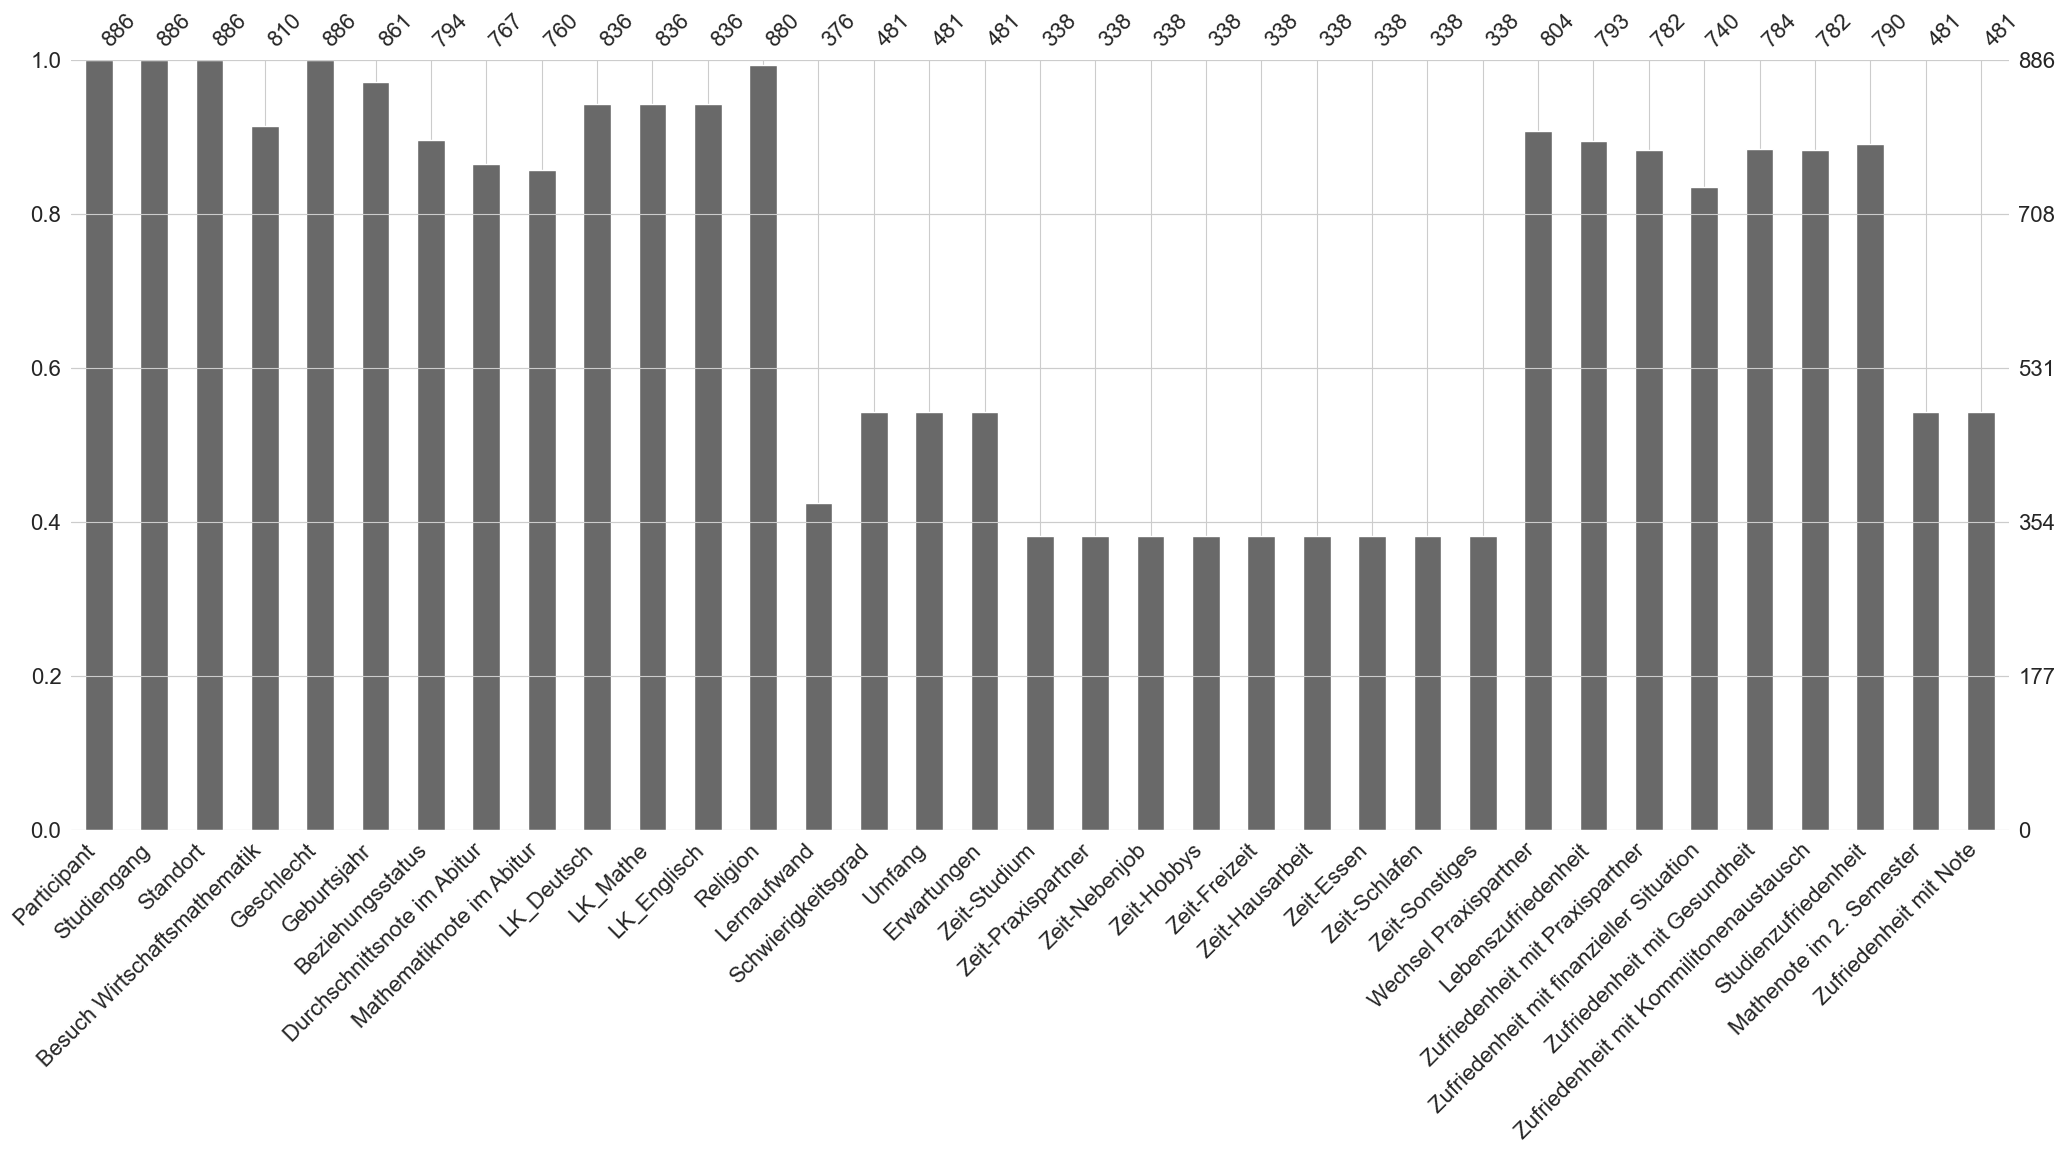

In [18]:
# Graphische Darstellung der fehlenden Werte
msno.bar(uni_df)

# Count per Geschlecht

In [9]:

total_particitpants=len(uni_df['Participant'])

geschlecht_count=uni_df['Geschlecht'].value_counts()
count_male=geschlecht_count.get(1,0)
count_female=geschlecht_count.get(2,0)
count_diverse=geschlecht_count.get(3,0)


print("total_particitpants", total_particitpants)
print(geschlecht_count)
print("Number of Male",count_male)
print("Number of Female",count_female)
print("Number of Diverse",count_diverse)

total_particitpants 886
Geschlecht
2    625
1    258
3      3
Name: count, dtype: int64
Number of Male 258
Number of Female 625
Number of Diverse 3


# Vizualizierung pro Geschlecht

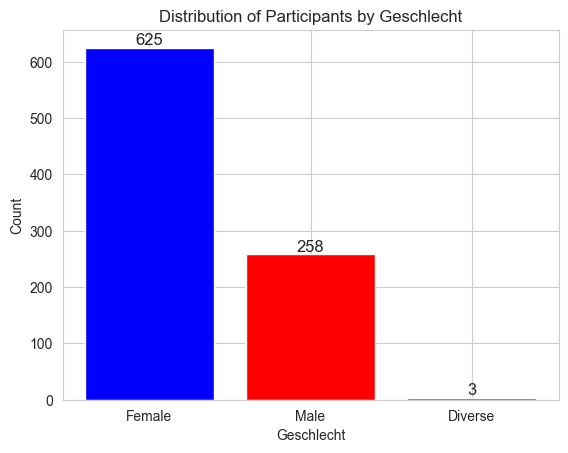

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


labels = {1: 'Male', 2: 'Female', 3: 'Diverse'}

uni_df['Geschlecht'] = uni_df['Geschlecht'].replace(labels)


geschlecht_counts = uni_df['Geschlecht'].value_counts()

colors = ['blue', 'red', 'green']

plt.bar(geschlecht_counts.index, geschlecht_counts.values, color=colors)

for idx, count in enumerate(geschlecht_counts):
    plt.text(idx, count, str(count), ha='center', va='bottom', fontsize=12)

plt.xlabel('Geschlecht')
plt.ylabel('Count')

plt.title('Distribution of Participants by Geschlecht')
t.show()


In [8]:
import pandas as pd
from scipy import stats

columns_list = ['Participant', 'Studiengang', 'Standort', 'Besuch Wirtschaftsmathematik', 'Geschlecht', 'Geburtsjahr', 'Beziehungsstatus', 'Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'LK_Deutsch', 'LK_Mathe', 'LK_Englisch', 'Religion', 'Lernaufwand', 'Schwierigkeitsgrad', 'Umfang', 'Erwartungen', 'Zeit-Studium', 'Zeit-Praxispartner', 'Zeit-Nebenjob', 'Zeit-Hobbys', 'Zeit-Freizeit', 'Zeit-Hausarbeit', 'Zeit-Essen', 'Zeit-Schlafen', 'Zeit-Sonstiges', 'Wechsel Praxispartner', 'Lebenszufriedenheit', 'Zufriedenheit mit Praxispartner', 'Zufriedenheit mit finanzieller Situation', 'Zufriedenheit mit Gesundheit', 'Zufriedenheit mit Kommilitonenaustausch', 'Studienzufriedenheit', 'Mathenote im 2. Semester', 'Zufriedenheit mit Note']


column_string = ' + '.join(columns_list)

print(column_string)


Participant + Studiengang + Standort + Besuch Wirtschaftsmathematik + Geschlecht + Geburtsjahr + Beziehungsstatus + Durchschnittsnote im Abitur + Mathematiknote im Abitur + LK_Deutsch + LK_Mathe + LK_Englisch + Religion + Lernaufwand + Schwierigkeitsgrad + Umfang + Erwartungen + Zeit-Studium + Zeit-Praxispartner + Zeit-Nebenjob + Zeit-Hobbys + Zeit-Freizeit + Zeit-Hausarbeit + Zeit-Essen + Zeit-Schlafen + Zeit-Sonstiges + Wechsel Praxispartner + Lebenszufriedenheit + Zufriedenheit mit Praxispartner + Zufriedenheit mit finanzieller Situation + Zufriedenheit mit Gesundheit + Zufriedenheit mit Kommilitonenaustausch + Studienzufriedenheit + Mathenote im 2. Semester + Zufriedenheit mit Note


                                    Variable  durchgeführter Test  \
0                                Participant  Pearson-Korrelation   
1                                Studiengang  Pearson-Korrelation   
2                                   Standort  Pearson-Korrelation   
3               Besuch_Wirtschaftsmathematik  Pearson-Korrelation   
4                                 Geschlecht  Pearson-Korrelation   
5                                Geburtsjahr  Pearson-Korrelation   
6                           Beziehungsstatus  Pearson-Korrelation   
7                Durchschnittsnote_im_Abitur  Pearson-Korrelation   
8                   Mathematiknote_im_Abitur  Pearson-Korrelation   
9                                 LK_Deutsch  Pearson-Korrelation   
10                                  LK_Mathe  Pearson-Korrelation   
11                               LK_Englisch  Pearson-Korrelation   
12                                  Religion  Pearson-Korrelation   
13                               L

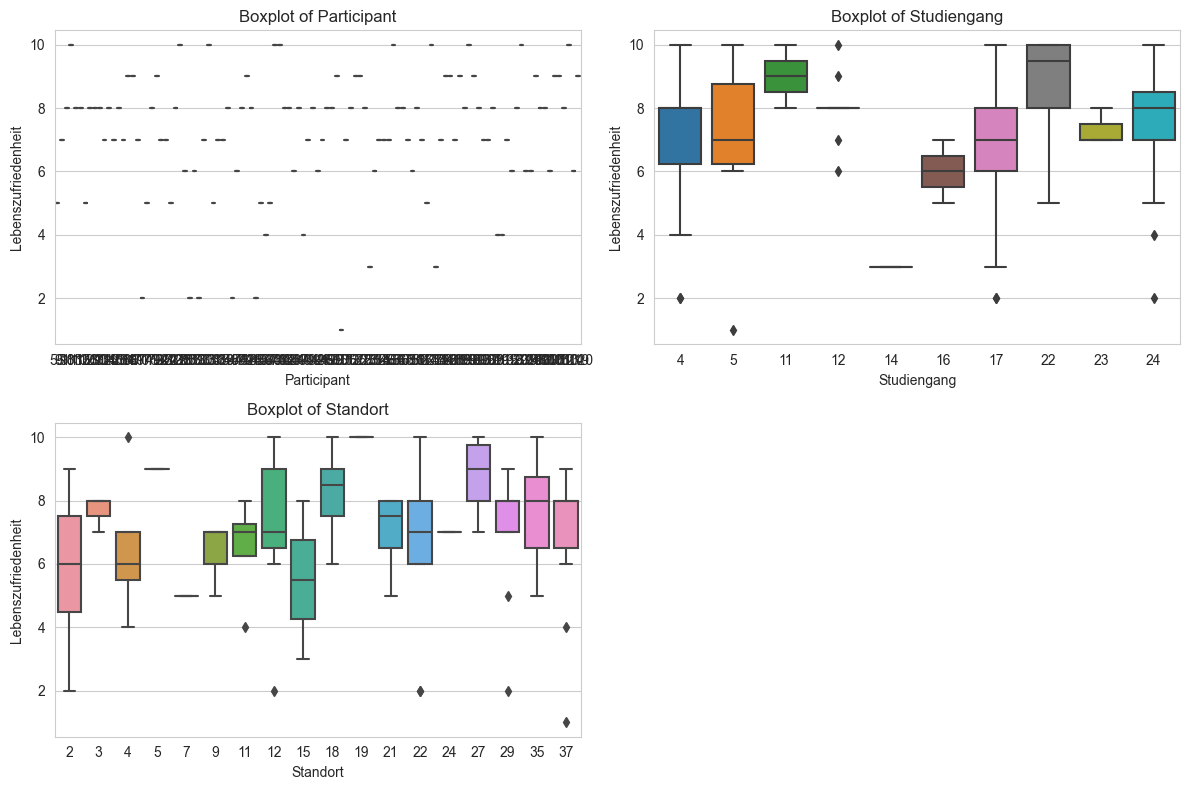

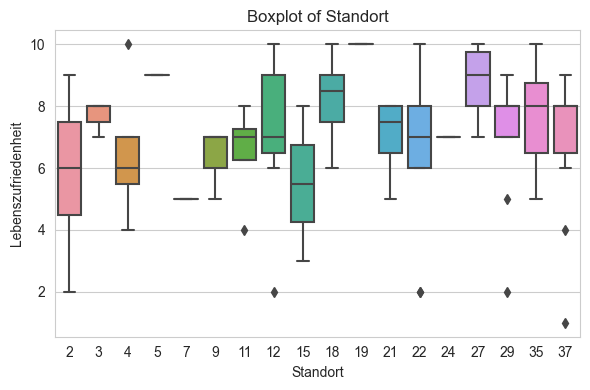

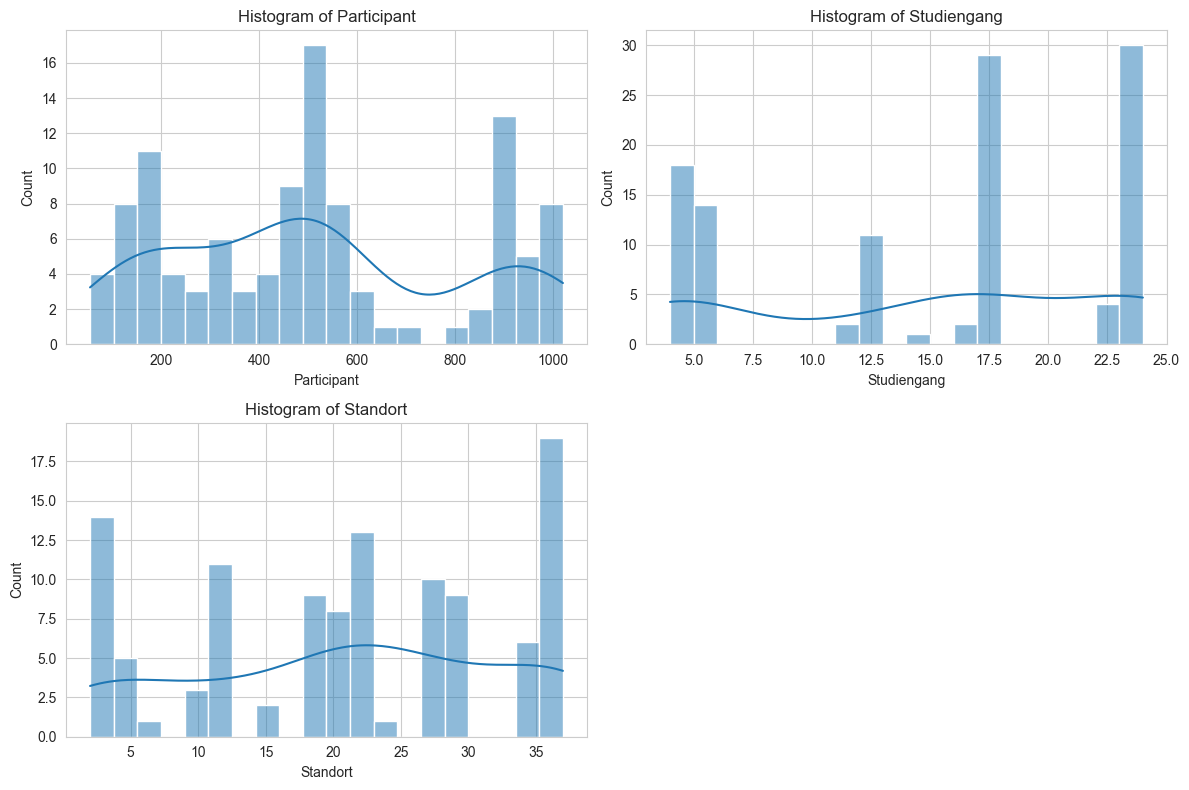

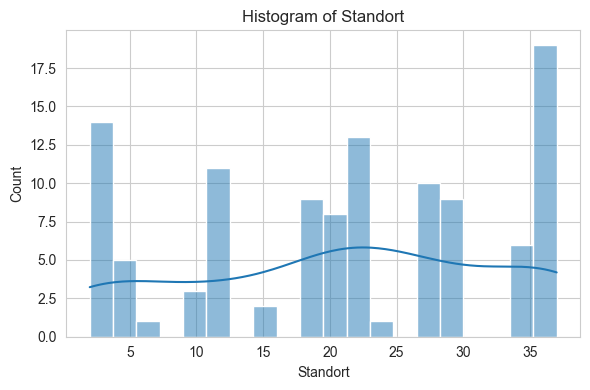

In [26]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
uni_df = pd.read_excel("C:\\Users\\User\\Desktop\\Statistik\\Project\\Fallstudiendaten_Uni.xlsx")

columns_list = ['Participant', 'Studiengang', 'Standort', 'Besuch Wirtschaftsmathematik', 'Geschlecht', 'Geburtsjahr', 'Beziehungsstatus', 'Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'LK_Deutsch', 'LK_Mathe', 'LK_Englisch', 'Religion', 'Lernaufwand', 'Schwierigkeitsgrad', 'Umfang', 'Erwartungen', 'Zeit-Studium', 'Zeit-Praxispartner', 'Zeit-Nebenjob', 'Zeit-Hobbys', 'Zeit-Freizeit', 'Zeit-Hausarbeit', 'Zeit-Essen', 'Zeit-Schlafen', 'Zeit-Sonstiges', 'Wechsel Praxispartner', 'Lebenszufriedenheit', 'Zufriedenheit mit Praxispartner', 'Zufriedenheit mit finanzieller Situation', 'Zufriedenheit mit Gesundheit', 'Zufriedenheit mit Kommilitonenaustausch', 'Studienzufriedenheit', 'Mathenote im 2. Semester', 'Zufriedenheit mit Note']
columns_without_spaces = [column_name.replace(" ", "_").replace("-", "_").replace(".", "") for column_name in columns_list]
uni_df.columns = columns_without_spaces

columns_list_without_lebenszufriedenheit = ['Participant', 'Studiengang', 'Standort', 'Besuch Wirtschaftsmathematik', 'Geschlecht', 'Geburtsjahr', 'Beziehungsstatus', 'Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'LK_Deutsch', 'LK_Mathe', 'LK_Englisch', 'Religion', 'Lernaufwand', 'Schwierigkeitsgrad', 'Umfang', 'Erwartungen', 'Zeit-Studium', 'Zeit-Praxispartner', 'Zeit-Nebenjob', 'Zeit-Hobbys', 'Zeit-Freizeit', 'Zeit-Hausarbeit', 'Zeit-Essen', 'Zeit-Schlafen', 'Zeit-Sonstiges', 'Wechsel Praxispartner', 'Zufriedenheit mit Praxispartner', 'Zufriedenheit mit finanzieller Situation', 'Zufriedenheit mit Gesundheit', 'Zufriedenheit mit Kommilitonenaustausch', 'Studienzufriedenheit', 'Mathenote im 2. Semester', 'Zufriedenheit mit Note']
columns_without_spaces = [column_name.replace(" ", "_").replace("-", "_").replace(".", "") for column_name in columns_list_without_lebenszufriedenheit]

# Convert column names to lowercase to match the DataFrame
columns_lowercase = [column.lower() for column in uni_df.columns]

# Check if the selected variables are present in the DataFrame
if all(var.lower() in columns_lowercase for var in columns_without_spaces):
    selected_variables = columns_without_spaces

    # Drop rows with missing values in selected variables
    uni_df_cleaned = uni_df[selected_variables + ['Lebenszufriedenheit']].dropna()

    significant_variables = []

    for column in selected_variables:
        x = uni_df_cleaned[column]
        y = uni_df_cleaned['Lebenszufriedenheit']

        if pd.api.types.is_numeric_dtype(x):
            # Check and remove infinite values from x
            x = x.replace([np.inf, -np.inf], np.nan).dropna()

            corr, p_value = stats.pearsonr(x, y)
            test_name = 'Pearson-Korrelation'
        elif pd.api.types.is_categorical_dtype(x):
            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            continue

        significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

    significant_variables_df = pd.DataFrame(significant_variables)
    print(significant_variables_df)

    descriptive_stats = uni_df_cleaned[selected_variables].describe()
    print("\nDescriptive Statistics:")
    print(descriptive_stats)

    # Make sure selected_variables has at least three elements
    if len(selected_variables) >= 3:
        plt.figure(figsize=(12, 8))
        for i, variable in enumerate(selected_variables[:3]):
            plt.subplot(2, 2, i + 1)
            sns.boxplot(x=variable, y='Lebenszufriedenheit', data=uni_df_cleaned)
            plt.title(f"Boxplot of {variable}")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(6, 4))
        sns.boxplot(x=selected_variables[2], y='Lebenszufriedenheit', data=uni_df_cleaned)
        plt.title(f"Boxplot of {selected_variables[2]}")
        plt.tight_layout()
        plt.show()

        # Histograms for the selected variables
        plt.figure(figsize=(12, 8))
        for i, variable in enumerate(selected_variables[:3]):
            plt.subplot(2, 2, i + 1)
            sns.histplot(data=uni_df_cleaned, x=variable, bins=20, kde=True)
            plt.title(f"Histogram of {variable}")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(6, 4))
        sns.histplot(data=uni_df_cleaned, x=selected_variables[2], bins=20, kde=True)
        plt.title(f"Histogram of {selected_variables[2]}")
        plt.tight_layout()
        plt.show()
    else:
        print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")
else:
    print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")


In [22]:
uni_df

,Participant,Studiengang,Standort,Besuch Wirtschaftsmathematik,Geschlecht,Geburtsjahr,Beziehungsstatus,Durchschnittsnote im Abitur,Mathematiknote im Abitur,LK_Deutsch,...,Zeit-Sonstiges,Wechsel Praxispartner,Lebenszufriedenheit,Zufriedenheit mit Praxispartner,Zufriedenheit mit finanzieller Situation,Zufriedenheit mit Gesundheit,Zufriedenheit mit Kommilitonenaustausch,Studienzufriedenheit,Mathenote im 2. Semester,Zufriedenheit mit Note
0,53,4,21,5.0,1,24.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,4,21,6.0,2,19.0,3.0,3.0,3.0,0.0,...,1.0,2.0,5.0,3.0,2.0,5.0,7.0,7.0,1.3,2.0
2,56,4,21,6.0,2,22.0,1.0,3.3,2.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,16,21,8.0,2,21.0,2.0,2.3,3.0,1.0,...,NaN,2.0,6.0,3.0,2.0,6.0,5.0,6.0,NaN,NaN
4,58,16,21,5.0,1,19.0,1.0,NaN,NaN,NaN,...,NaN,3.0,10.0,10.0,6.0,10.0,5.0,10.0,1.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1022,24,18,NaN,2,23.0,NaN,2.0,2.0,0.0,...,36.0,3.0,4.0,6.0,10.0,3.0,1.0,6.0,2.0,3.0
882,1023,24,18,NaN,2,23.0,2.0,3.3,4.0,0.0,...,NaN,3.0,9.0,8.0,5.0,10.0,6.0,7.0,4.0,2.0
883,1024,4,18,NaN,1,20.0,NaN,NaN,3.0,0.0,...,31.0,3.0,7.0,7.0,3.0,6.0,8.0,6.0,3.7,3.0
884,1025,5,18,6.0,1,22.0,1.0,2.0,2.0,0.0,...,NaN,3.0,8.0,8.0,7.0,9.0,9.0,9.0,3.0,2.0


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
uni_df = pd.read_excel("C:\\Users\\User\\Desktop\\Statistik\\Project\\Fallstudiendaten_Uni.xlsx")

dependent_variable = 'Lebenszufriedenheit'
selected_variables = ['Studienzufriedenheit', 'Zufriedenheit mit Praxispartner']

# Drop rows with missing values in selected variables
uni_df_cleaned = uni_df[selected_variables + [dependent_variable]].dropna()

significant_variables = []

if all(var in uni_df_cleaned.columns for var in selected_variables):
    for column in selected_variables:
        x = uni_df_cleaned[column]
        y = uni_df_cleaned[dependent_variable]

        if pd.api.types.is_numeric_dtype(x):
            # Check and remove infinite values from x
            x = x.replace([np.inf, -np.inf], np.nan).dropna()

            corr, p_value = stats.pearsonr(x, y)
            test_name = 'Pearson-Korrelation'
        elif pd.api.types.is_categorical_dtype(x):
            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            continue

        significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

    significant_variables_df = pd.DataFrame(significant_variables)
    print(significant_variables_df)

    descriptive_stats = uni_df_cleaned[selected_variables].describe()
    print("\nDescriptive Statistics:")
    print(descriptive_stats)

    # Make sure selected_variables has at least three elements
    if len(selected_variables) >= 3:
        plt.figure(figsize=(12, 8))
        for i, variable in enumerate(selected_variables[:3]):
            plt.subplot(2, 2, i + 1)
            sns.boxplot(x=variable, data=uni_df_cleaned)
            plt.title(f"Boxplot of {variable}")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(6, 4))
        sns.boxplot(x=selected_variables[2], data=uni_df_cleaned)
        plt.title(f"Boxplot of {selected_variables[2]}")
        plt.tight_layout()
        plt.show()

        # Histograms for the selected variables
        plt.figure(figsize=(12, 8))
        for i, variable in enumerate(selected_variables[:3]):
            plt.subplot(2, 2, i + 1)
            sns.histplot(uni_df_cleaned[variable], bins=20, kde=True)
            plt.title(f"Histogram of {variable}")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(6, 4))
        sns.histplot(uni_df_cleaned[selected_variables[2]], bins=20, kde=True)
        plt.title(f"Histogram of {selected_variables[2]}")
        plt.tight_layout()
        plt.show()
    else:
        print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")
else:
    print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")


                          Variable  durchgeführter Test  Ergebnis des Tests
0             Studienzufriedenheit  Pearson-Korrelation        2.787878e-31
1  Zufriedenheit mit Praxispartner  Pearson-Korrelation        1.515794e-22

Descriptive Statistics:
       Studienzufriedenheit  Zufriedenheit mit Praxispartner
count            770.000000                       770.000000
mean               5.922078                         6.714286
std                2.126471                         2.594167
min                0.000000                         0.000000
25%                5.000000                         5.000000
50%                6.000000                         7.000000
75%                7.000000                         9.000000
max               10.000000                        10.000000
Die ausgewählten Variablen sind nicht im DataFrame vorhanden.


In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
uni_df = pd.read_excel("C:\\Users\\User\\Desktop\\Statistik\\Project\\Fallstudiendaten_Uni.xlsx")

# Update the column names to match the modifications made earlier
columns_list_without_lebenszufriedenheit = ['Participant', 'Studiengang', 'Standort', 'Besuch Wirtschaftsmathematik', 'Geschlecht', 'Geburtsjahr', 'Beziehungsstatus', 'Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'LK_Deutsch', 'LK_Mathe', 'LK_Englisch', 'Religion', 'Lernaufwand', 'Schwierigkeitsgrad', 'Umfang', 'Erwartungen', 'Zeit-Studium', 'Zeit-Praxispartner', 'Zeit-Nebenjob', 'Zeit-Hobbys', 'Zeit-Freizeit', 'Zeit-Hausarbeit', 'Zeit-Essen', 'Zeit-Schlafen', 'Zeit-Sonstiges', 'Wechsel Praxispartner', 'Zufriedenheit_mit_Praxispartner', 'Zufriedenheit_mit_finanzieller_Situation', 'Zufriedenheit_mit_Gesundheit', 'Zufriedenheit_mit_Kommilitonenaustausch', 'Studienzufriedenheit', 'Mathenote_im_2_Semester', 'Zufriedenheit_mit_Note']
columns_without_spaces = [column_name.replace(" ", "_").replace("-", "_").replace(".", "") for column_name in columns_list_without_lebenszufriedenheit]
uni_df.columns = columns_without_spaces

# Select only the relevant columns
selected_variables = ['Studienzufriedenheit', 'Zufriedenheit_mit_Praxispartner']
uni_df_cleaned = uni_df[selected_variables].dropna()

# Calculate correlation between Studienzufriedenheit and Zufriedenheit_mit_Praxispartner
corr, p_value = stats.pearsonr(uni_df_cleaned['Studienzufriedenheit'], uni_df_cleaned['Zufriedenheit_mit_Praxispartner'])
print("Correlation between Studienzufriedenheit and Zufriedenheit_mit_Praxispartner:")
print("Pearson correlation coefficient:", corr)
print("P-value:", p_value)

# Boxplot of Studienzufriedenheit and Zufriedenheit_mit_Praxispartner
plt.figure(figsize=(10, 6))
sns.boxplot(data=uni_df_cleaned, x='Studienzufriedenheit', y='Zufriedenheit_mit_Praxispartner')
plt.title("Boxplot of Studienzufriedenheit and Zufriedenheit_mit_Praxispartner")
plt.show()

# Histogram of Studienzufriedenheit and Zufriedenheit_mit_Praxispartner
plt.figure(figsize=(10, 6))
sns.histplot(data=uni_df_cleaned, x='Studienzufriedenheit', bins=20, kde=True)
plt.title("Histogram of Studienzufriedenheit")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=uni_df_cleaned, x='Zufriedenheit_mit_Praxispartner', bins=20, kde=True)
plt.title("Histogram of Zufriedenheit_mit_Praxispartner")
plt.show()



ValueError: Length mismatch: Expected axis has 35 elements, new values have 34 elements